In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL

In [43]:
fn_init = "./pic/expand_dataset/used_pic/initial_png.png"
fn_1 = "./pic/expand_dataset/used_pic/Wechat_11.png"
im_init = plt.imread(fn_init)
im_1 = plt.imread(fn_1)

In [44]:
import cut
fn_init_cut = np.array(cut.cut_func("difficult",fn_init))
fn_1_cut = np.array(cut.cut_func("difficult",fn_1))

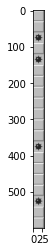

In [45]:
plt.imshow(fn_1_cut[:20].reshape(600,30,4))

In [1]:
a = [1,2,3,4]
b = map (lambda x:x**2,a)
for i in b:
    print (i)

1
4
9
16


In [4]:
im = plt.imread("./pic/expand_dataset/used_pic/Wechat_8.png")
im.shape

(429, 300, 4)

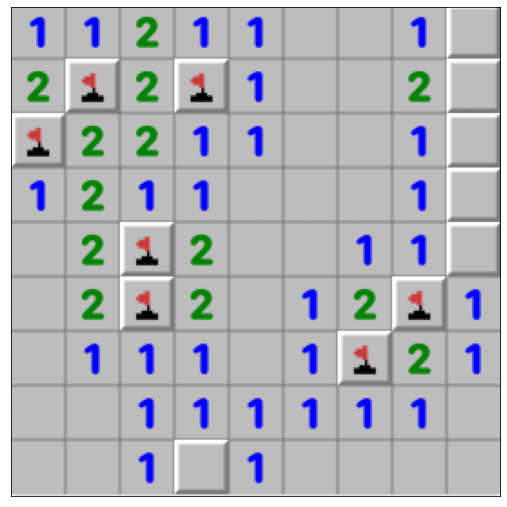

(270, 270, 4)

In [13]:
im = plt.imread("./pic/expand_dataset/used_pic/Wechat_8.png")
im = im[145:415,15:285,:]
SIZE = 30
plt.figure(figsize=(18,9))
plt.xticks(())
plt.yticks(())
plt.imshow(im)
plt.show()
im.shape

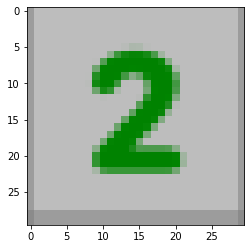

In [55]:
filename = "./pic/expand_dataset/used_pic/Wechat_8.png"
im = plt.imread(filename)
im = im[145:415,15:285,:]
all_1 = im.reshape(9,30,9,30,4)
# all_1.shape
plt.imshow(all_1[2,:,2,:,:])

In [81]:
all_1 = im.reshape(16,30,30,30,4)
little_im = list()
res = list()
res.append(all_1[0,:,0,:,:])

for i in range (16):
    for j in range (30):
        for k in res:
            if np.allclose(k,all_1[i,:,j,:,:]):
                break
        else:
            res.append(all_1[i,:,j,:,:])



(['1'], ['1'])

In [80]:
for i,little_im in enumerate(res):
    plt.imsave("pic/%d.png"%i,little_im)

In [210]:
from torch.utils.data import Dataset  # 导入Dataset后可以使用“help(Dataset)查看官方文档”
from PIL import Image                 # 借助PIL库导入数据图片
import os                             # 借助os库来用路径读入数据
from torch.utils.data import DataLoader
from torchvision import transforms
loader = transforms.Compose([transforms.ToTensor()])
import torch.nn as nn
import torch

def label_index(index):
    z = torch.zeros(8)
    z[index] = 1
    return z

label_name = ["num_1","num_2","num_3","num_4","num_5","lei","kong","zha"]
label_dict = {
    label_name[i] : label_index(i) for i in range (8)
}


{'num_1': tensor([1., 0., 0., 0., 0., 0., 0., 0.]),
 'num_2': tensor([0., 1., 0., 0., 0., 0., 0., 0.]),
 'num_3': tensor([0., 0., 1., 0., 0., 0., 0., 0.]),
 'num_4': tensor([0., 0., 0., 1., 0., 0., 0., 0.]),
 'num_5': tensor([0., 0., 0., 0., 1., 0., 0., 0.]),
 'lei': tensor([0., 0., 0., 0., 0., 1., 0., 0.]),
 'kong': tensor([0., 0., 0., 0., 0., 0., 1., 0.]),
 'zha': tensor([0., 0., 0., 0., 0., 0., 0., 1.])}

In [211]:
class Mydata(Dataset):                  # 根据官方文档，自己创建的类必须继承Dataset
    def __init__(self,root_dir,label_dir):          # 初始化操作,传入图片所在的根目录路径（root_dir）和label的路径（label_dir）获得一个路径列表（img_path）
        self.root_dir = root_dir
        self.label_dir = label_dir
        self.path = os.path.join(self.root_dir,self.label_dir)  # 用join把路径拼接一起可以避免一些因“/”引发的错误
        self.img_path = os.listdir(self.path)                   # 将该路径下的所有文件变成一个列表
        self.imgs = [os.path.join(self.root_dir,self.label_dir,img) for img in self.img_path]

    def __getitem__(self,idx):                                # 使用index(简写为idx)获取某个数据
        # img_name = self.img_path[idx]                           # img_path列表里每个元素就是对应图片文件名
        # img_item_path = os.path.join(self.root_dir,self.label_dir,img_name)	# 获得对应图片路径
        img = Image.open(self.imgs[idx]).convert("L")                                   # 使用PIL库下Image工具，打开对应路径图片
        img = loader(img).unsqueeze(0).reshape(1,30,30)
        label = self.label_dir                                              # 本数据集label就是文件名，如“ants”（虽然命名为dir看似路径，实则视作字符串会更容易理解）
        label = label_dict[label]
        return img,label     # 返回对应图片和图片的label

    def __len__(self):
        return len(self.imgs)


# 调用
# dataset_all = 
root_dir = "./pic"
num1_label_dir = "num_1"
num1_dataset = Mydata(root_dir,num1_label_dir)
num2_label_dir = "num_2"
num2_dataset = Mydata(root_dir,num2_label_dir)
num3_label_dir = "num_3"
num3_dataset = Mydata(root_dir,num3_label_dir)
num4_label_dir = "num_4"
num4_dataset = Mydata(root_dir,num4_label_dir)
num5_label_dir = "num_5"
num5_dataset = Mydata(root_dir,num5_label_dir)
lei_label_dir = "lei"
lei_dataset = Mydata(root_dir,lei_label_dir)
zha_label_dir = "zha"
zha_dataset = Mydata(root_dir,zha_label_dir)
kong_label_dir = "kong"
kong_dataset = Mydata(root_dir,kong_label_dir)

# train_dataset = num1_dataset[0] + num2_dataset[0]
train_dataset = num1_dataset + num2_dataset  + num3_dataset + num4_dataset + num5_dataset + lei_dataset + kong_dataset


In [212]:
train_dataset = DataLoader(dataset=train_dataset, batch_size=batch_size,num_workers=0,shuffle=True)
train_dataset = list(train_dataset)

In [213]:
img_1,_ = train_dataset[0]
img_1.shape

torch.Size([4, 1, 30, 30])

In [214]:

class Batch_Net(nn.Module):
    def __init__(self, in_dim, n_hiddle_1, n_hiddle_2, out_dim):
        super(Batch_Net, self).__init__()
        self.layer1 = nn.Sequential(nn.Linear(in_dim, n_hiddle_1), nn.BatchNorm1d(n_hiddle_1), nn.ReLU(True))
        self.layer2 = nn.Sequential(nn.Linear(n_hiddle_1, n_hiddle_2), nn.BatchNorm1d(n_hiddle_2), nn.ReLU(True))
        self.layer3 = nn.Sequential(nn.Linear(n_hiddle_2, out_dim))
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x

In [215]:
from torch import optim, nn
from torch.autograd import Variable
criterion = nn.BCEWithLogitsLoss()
learning_rate = 1e-2
model = Batch_Net(in_dim=30*30,n_hiddle_1=300,n_hiddle_2=100,out_dim=8)
opitimizer = optim.SGD(model.parameters(), lr=learning_rate)


for i in range(epoch):
    for img, label in train_dataset:
        batch_len = len(img)
        img = img.view(batch_len, -1)
        img = Variable(img)
        label = Variable(label)
        # forward
        out = model(img)
        loss = criterion(out, label)
        # backward
        opitimizer.zero_grad()
        loss.backward()
        opitimizer.step()
        # 打印
        # print("epoches= {},loss is {}".format(i, loss))

In [222]:
pre = model(img).detach().numpy()
print (pre)
print (label)

def get_pre_name(pre):
    max1 = max(pre[1])
    pre_index = pre[1].tolist().index(max1)
    pre_name = label_name[pre_index]
    return pre_name

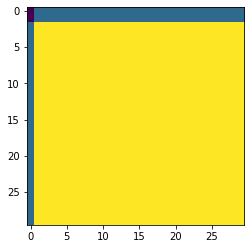

KeyError: tensor([1., 0., 0., 0., 0., 0., 0., 0.])